<a href="https://colab.research.google.com/github/MalakZakaria01/W2023/blob/main/Another_copy_of_Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Malak Zakaria Noureldin

ID: 52-4270

Tutorial: T02

---

Name: Sara Sayed

ID: 52-4754

Tutorial: T02

---

Name: Samaa Elozeiry

ID: 52-2518

Tutorial: T02

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-17-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()
df.isnull().sum()
print('Number of rows and columns in the data set:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB
Number of rows and columns in the data set: (46578, 16

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
import pandas as pd
try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')
df['body'] = df['body'].str.capitalize()
df['sellingprice'] = df['sellingprice'].str.extract(r'(\d+)' , expand=False).str.strip()
df['sellingprice'] = df['sellingprice'].astype(int)
df['mmr'] = df['mmr'].str.extract(r'(\d+)' , expand=False).str.strip()
df['mmr'] = df['mmr'].astype(int)
df['odometer'] = df['odometer'].str.extract(r'(\d+)' , expand=False).str.strip()
df['odometer'] = df['odometer'].astype(int)
#df['saledate'] = pd.to_datetime(df['saledate'])
#df['interior'] = df['interior'].interpolate().astype(str)
df['interior'] = df['interior'].replace('—', pd.NA)
mode_color = df['interior'].mode()[0]  # Get the mode (most frequent color)
df['interior'].fillna(mode_color, inplace=True)
df['color'] = df['color'].replace('—', pd.NA)
mode_color = df['color'].mode()[0]
df['color'].fillna(mode_color, inplace=True)
patterns_and_categories = [
    ('Sedan', 'Sedan'),
    ('Suv', 'SUV'),
    ('van', 'Minivan'),
    ('cab', 'Pickup Truck'),
    ('Coupe', 'Coupe'),
    ('convertible', 'Convertible'),
    ('supercrew', 'Pickup Truck'),
    ('wagon','Wagon'),
    ('koup','Coupe'),
    ('Hatchback','Hatchback')
]

# Iterate through patterns and assign categories based on regex matching
for pattern, category in patterns_and_categories:
    df.loc[df['body'].str.contains(pattern, case=False, regex=True), 'body'] = category


print(df['body'].unique())

['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']


In [ ]:
corr = df.corr()
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs())


<ipython-input-20-12dc2e09b7be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


sellingprice    1.000000
mmr             0.979783
year            0.581164
odometer       -0.580900
condition       0.529141
Name: sellingprice, dtype: float64

In [ ]:
print()

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

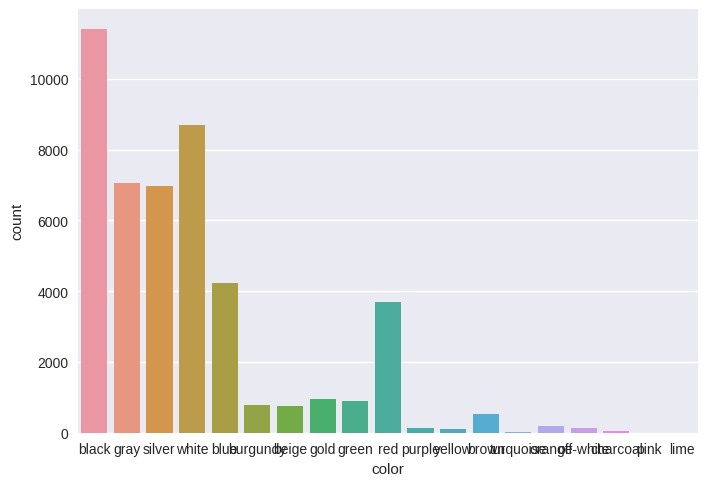

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

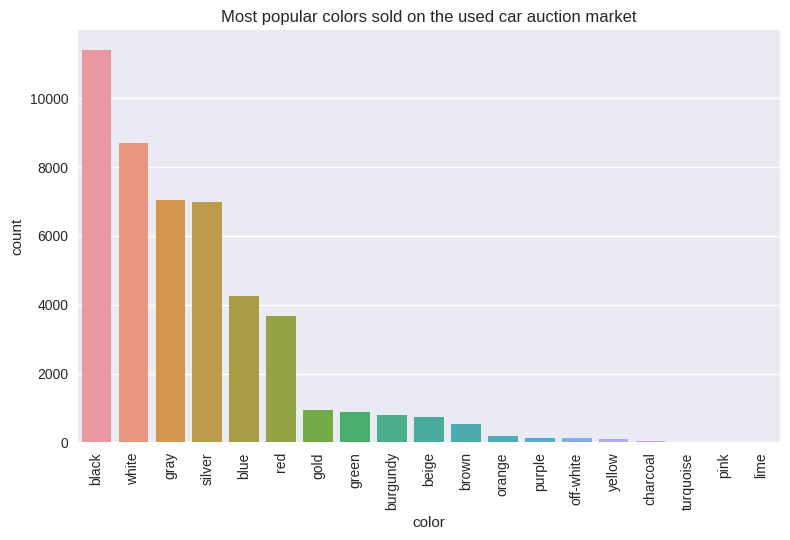

In [ ]:

large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

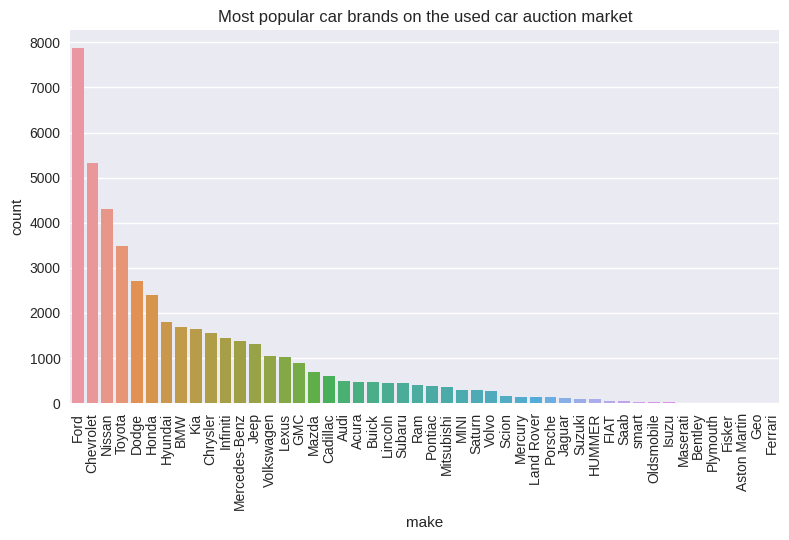

In [ ]:

large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Your answer here
The answer is:
'Ford', 'Chevrolet' and 'Nissan'

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

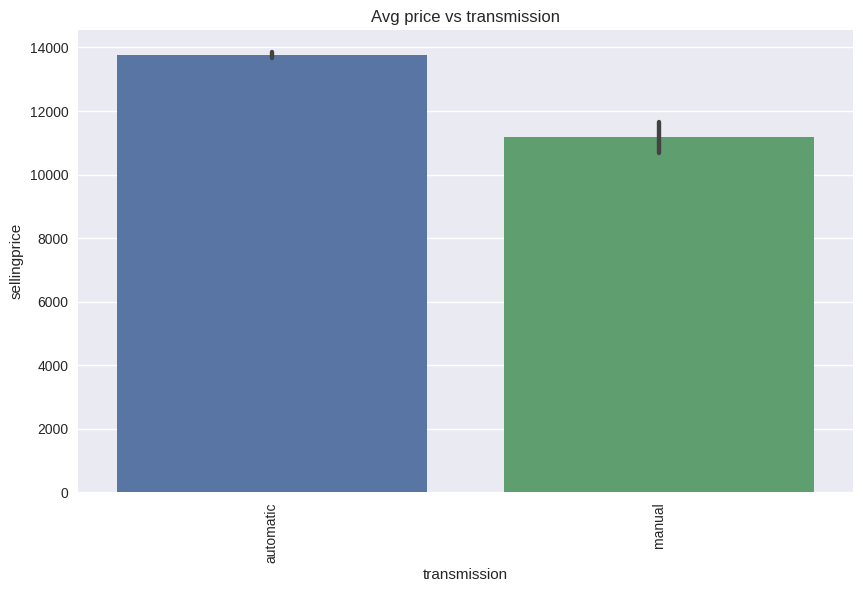

In [ ]:


plt.figure(figsize=(10,6))
sns.barplot(data=df , x='transmission', y= 'sellingprice', order=df.groupby('transmission')['sellingprice'].mean().index)
plt.xlabel('transmission')
plt.ylabel('sellingprice')
plt.title('Avg price vs transmission')
plt.xticks(rotation=90)
plt.show()




#sns.barplot(df, x="transmission", y="sellingprice", hue= 'transmission').set(title='The selling price of each of the transmission categories(0-->manual,1-->automatic)')


**Answer for Q2**: Your answer here
Thus, the answer it that the automatic cars based on average price automatic cars sell higher than the manual.


**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**



**Visualization**

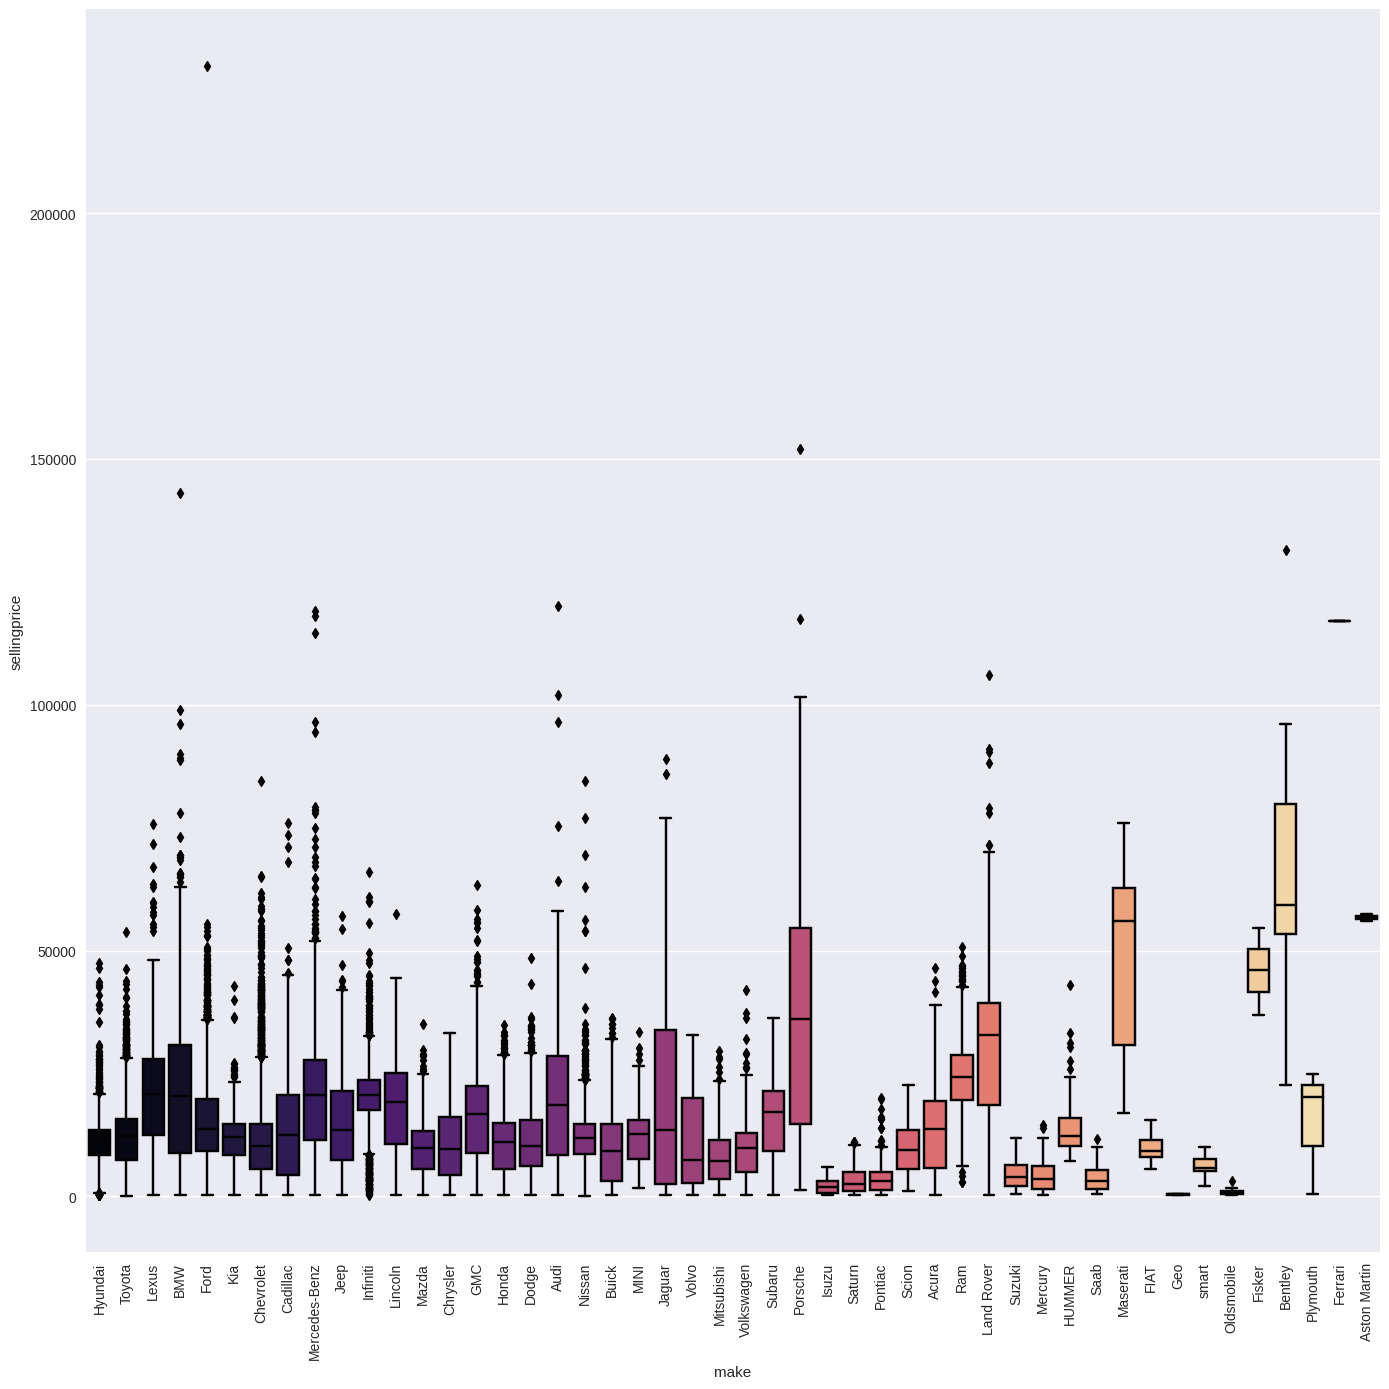

In [ ]:
f = plt.figure(figsize=(14,14))
sns.boxplot(x='make', y='sellingprice', data=df, palette='magma')
plt.xticks(rotation=90)
plt.tight_layout()



**Answer for Q3**: Your answer here
according to the boxplot,the top 4 that has the widest distribution based on the on averege price is Porsche,Bently, Juguar, Maserati, they have the maximum length of boxplot.
prorsche and benalty have the maximum price.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

<ipython-input-27-739e2064019b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


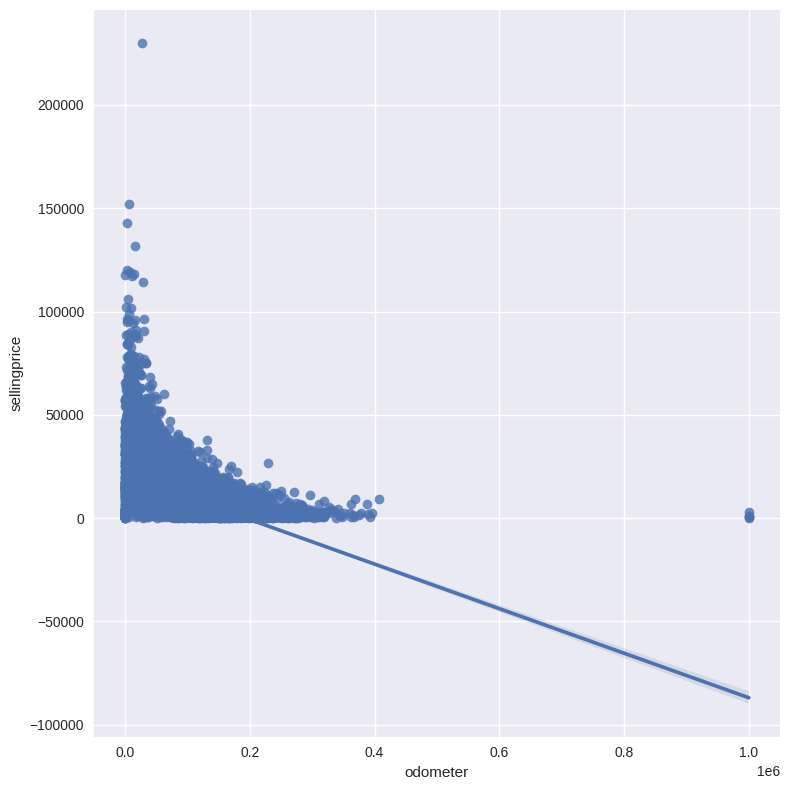

In [ ]:
corr = df.corr()
corr['odometer'].sort_values(ascending=False, key=lambda x: x.abs())
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8);



**Answer for Q4**: Your answer here
As elaborated before, the odimeter and the selling price are negatively correlated as the more the car covers more mileage the less selling price it has. the correlation was -0.58


**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

<ipython-input-28-e699318717df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


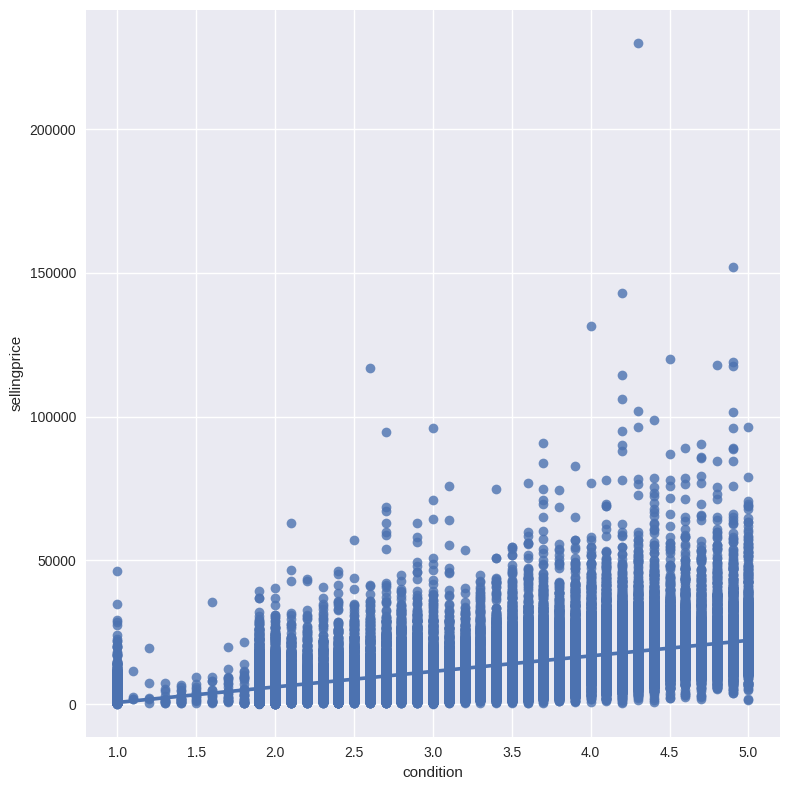

In [ ]:
corr = df.corr()
corr['condition'].sort_values(ascending=False, key=lambda x: x.abs())
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8);

**Answer for Q5**: Your answer here
The condition of the car as it increasing and approaching to 5 make the selling price increase and as it decrease to 1 makes the worst selling price , thus wit h a correlation of 0.529 it has a positive correlation.


**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**


**Visualization**

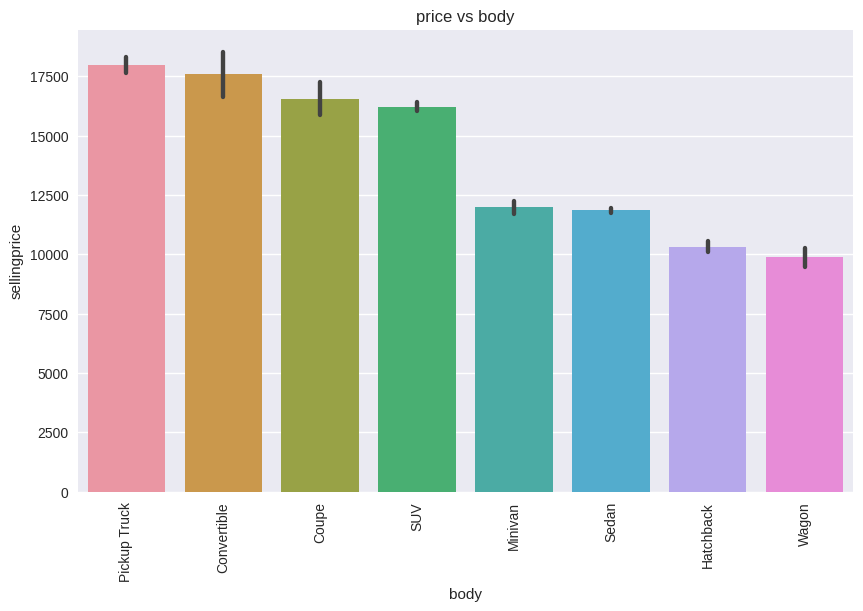

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df , x='body', y= 'sellingprice', order=df.groupby('body')['sellingprice'].mean().sort_values(ascending= False ).index)
plt.xlabel('body')
plt.ylabel('sellingprice')
plt.title('price vs body')
plt.xticks(rotation=90)
plt.show()





**Answer for Q6**: Your answer here
The body of the car has a direct relationship with the selling price
as the price increase and decrease based on differnt car types.consequently, when ranked we found out that pickup truck, converyibel and coupe are the top 3 ranked.


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
#encoding
categorical_columns = ['make','model','trim','body', 'transmission']
df = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

columns_to_drop = ['vin', 'saledate','seller','mmr','state','interior','color' ]
df.drop(columns=columns_to_drop , inplace = True)

numerical_columns = ['year','condition','odometer']


df[numerical_columns] = (

    df[numerical_columns] - df[numerical_columns].min()

) /(

    df[numerical_columns].max() - df[numerical_columns].min()
)


df.head()
from sklearn.model_selection import train_test_split

x = df.drop('sellingprice',axis=1) # Independent variable
y = df['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])



Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,2716.606539
1,theta_1,year,25436.864244
2,theta_2,condition,5113.501955
3,theta_3,odometer,-44246.373996
4,theta_4,make_Aston Martin,18648.419482
...,...,...,...
1797,theta_1797,body_Pickup Truck,3964.319040
1798,theta_1798,body_SUV,-2862.965132
1799,theta_1799,body_Sedan,-1885.565829
1800,theta_1800,body_Wagon,167.303244


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The root mean square error (RMSE) is:  3554.546733077136
R^2 obtained is: 0.8632440634969997
The mean absolute percentage error (MAPE) is:  0.4837060515635827
The median absolute error (MAE) is:  1400.1710705648588


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

The model's R-squared is 0.863 suggests that it can account for a sizable amount of the variation in used car pricing. The model's projections, however, may contain significant errors, as indicated by the comparatively high RMSE and MAPE, therefore a used car shop seeking extremely accurate estimations may find that it is not the best option.These may be caused by the
outliers in the dataset, which may have an impact on the RMSE and MAE. Outliers can be found and dealt with to potentially enhance model performance.More Information, Accuracy of the model can be improved by obtaining more information, particularly on sales of used cars.
Suggested actions:
 Boost Accuracy in order to lower prediction mistakes, identify and manage anomalous data points, called outliers.in addtion , we can
Investigate adding more pertinent data or improving features to increase model accuracy. We can also play Around with Various Models,consider experimenting with alternative prediction models, such Gradient Boosting or Random Forest, which may yield more accurate outcomes.furthermore,
To make sure the model performs effectively with fresh data, use cross-validation and maintain Updates as the used cars market changes, keep adding new data to the model.
We would recommend the model as it has high r2 but we would recommend improving the model to decrease the error and oultlies based on the recomendations mentioned above.

We choose the columns body, trim, make , transmission and model as those attributes are the the most significant attributes that are determinate of the price of the car.On the other attribute, attributes have no effect or very small effect  that would not change the price in a significant way.In addition when including them in our model the r2 was significantly affected negatively.
